<a href="https://colab.research.google.com/github/ViniViniAntunes/Escola_de_IA/blob/master/Exercicio_Aula07(Escola_Livre_de_IA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Support Vector Machine </center>
## Professor: Victor Venites
## Estudante: Vinicius Antunes
## Data: 14/04/2020
## Aula: 07

## 1. Importando as Bibliotecas de Python
- E Verificando o Ambiente

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- Print Working Directory

In [111]:
pwd

'/content'

- Minha Versão do Python
- Python 3.7.3

In [112]:
!python  --version

Python 3.6.9


## 2. Base de Dados OR
- Verdadeiro OU Falso

In [113]:
df_OR = pd.read_excel("OR.xlsx", index_col = "Lição")
df_OR

,Entrada_Um,Entrada_Dois,Saida_OR
Lição,,,
1,0,0,0
2,0,1,1
3,1,0,1
4,1,1,1


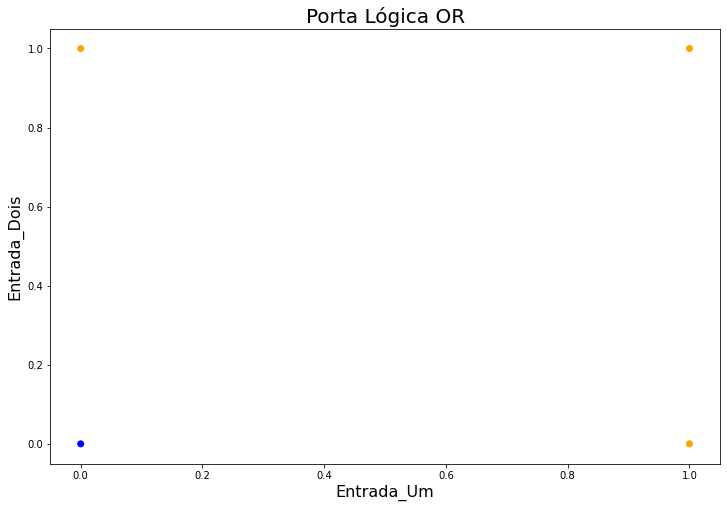

In [114]:
cores = ["blue", "orange", "orange", "orange"]
fig = plt.figure(figsize=(12, 8))
plt.scatter(df_OR["Entrada_Um"], df_OR["Entrada_Dois"], c = cores)
plt.title("Porta Lógica OR", fontsize=20)
plt.xlabel("Entrada_Um", fontsize=16)
plt.ylabel("Entrada_Dois", fontsize=16)
plt.savefig("Gráfico_OR.jpg")
plt.show()

## 3. Base de Dados AND
- Verdadeiro E Falso

In [115]:
df_AND = pd.read_excel("AND.xlsx", index_col = "Lição")
df_AND

,Entrada_Um,Entrada_Dois,Saida_AND
Lição,,,
1,0,0,0
2,0,1,0
3,1,0,0
4,1,1,1


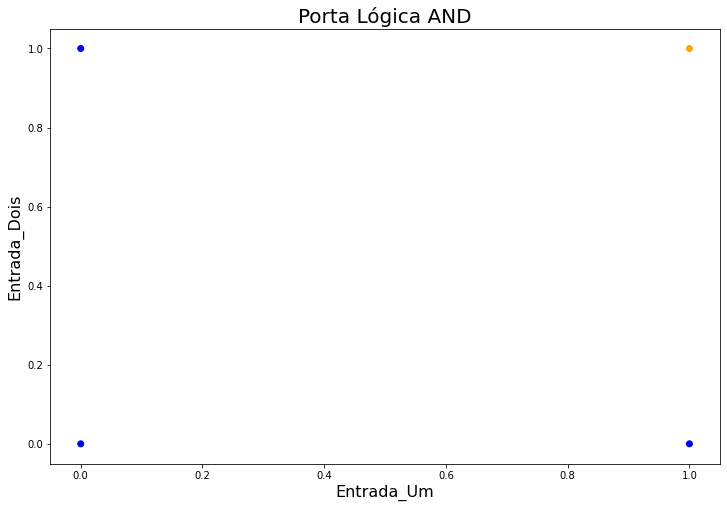

In [116]:
cores = ["blue", "blue", "blue", "orange"]
fig = plt.figure(figsize=(12, 8))
plt.scatter(df_AND["Entrada_Um"], df_AND["Entrada_Dois"], c = cores)
plt.title("Porta Lógica AND", fontsize=20)
plt.xlabel("Entrada_Um", fontsize=16)
plt.ylabel("Entrada_Dois", fontsize=16)
plt.savefig("Gráfico_AND.jpg")
plt.show()

## 4. Vamos Criar Nosso "BigData" de XOR

In [117]:
dados = {'Entrada_Um': [0, 0, 1, 1], 
         'Entrada_Dois': [0, 1, 0, 1], 
         'Saida_XOR': [0, 1, 1, 0]
         }
Indice = [1, 2, 3, 4]
df_XOR = pd.DataFrame(dados)
df_XOR

,Entrada_Um,Entrada_Dois,Saida_XOR
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


# Ou...

In [118]:
df_XOR = pd.read_excel("XOR.xlsx", index_col = "Lição")
df_XOR

,Entrada_Um,Entrada_Dois,Saida_XOR
Lição,,,
1,0,0,0
2,0,1,1
3,1,0,1
4,1,1,0


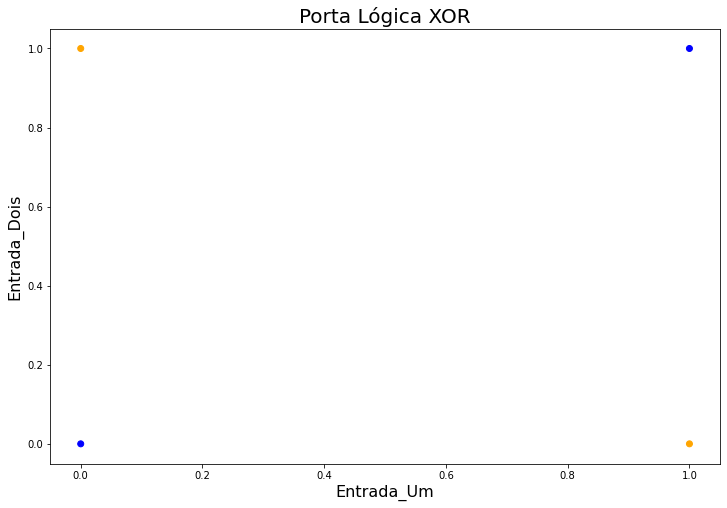

In [120]:
cores = ["blue", "orange", "orange", "blue"]
fig = plt.figure(figsize=(12, 8))
plt.scatter(df_XOR["Entrada_Um"], df_XOR["Entrada_Dois"], c = cores)
plt.title("Porta Lógica XOR", fontsize=20)
plt.xlabel("Entrada_Um", fontsize=16)
plt.ylabel("Entrada_Dois", fontsize=16)
plt.savefig("Gráfico_XOR.jpg")
plt.show()

## 5. Modelo Support Vector Machine
- Machina de Vetor de Suporte

In [121]:
df_OR

,Entrada_Um,Entrada_Dois,Saida_OR
Lição,,,
1,0,0,0
2,0,1,1
3,1,0,1
4,1,1,1


### 5.2. Versão do SkLearn

In [0]:
from sklearn.pipeline import Pipeline # Linha de trabalho (?)
from sklearn.preprocessing import StandardScaler # Para normalizar os dados
from sklearn.svm import LinearSVC # Para fazer a SVM
from sklearn.metrics import confusion_matrix # Para fazer as métricas

#### 5.2.1. Classificando OR

In [123]:
X_OR = df_OR.iloc[:, 0:-1]
y_OR = df_OR.iloc[:, -1]
y_OR

Lição
1    0
2    1
3    1
4    1
Name: Saida_OR, dtype: int64

In [124]:
svm_clf_OR = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 0.5, loss = "hinge", penalty='l2')),
])
svm_clf_OR.fit(X_OR, y_OR)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=0.5, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

#### 5.2.1.1. Resultados OR

In [125]:
svm_clf_OR.predict([[0, 0]])

array([0])

In [126]:
svm_clf_OR.predict([[0, 1]])

array([1])

In [127]:
svm_clf_OR.predict([[1, 0]])

array([1])

In [128]:
svm_clf_OR.predict([[1, 1]])

array([1])

#### 5.2.1.2. Matriz de Confusão
- A função considera os rótulos na ordem de chegada
- 0 como sendo a primeira classificação
- 1 como sendo a segunda classificação

In [129]:
Predicao_OR = svm_clf_OR.predict(X_OR)
confusion_matrix(y_OR, Predicao_OR)

array([[1, 0],
       [0, 3]])

In [130]:
df_OR_Predicao = df_OR.copy()
df_OR_Predicao["Predicao"] = Predicao_OR
df_OR_Predicao

,Entrada_Um,Entrada_Dois,Saida_OR,Predicao
Lição,,,,
1,0,0,0,0
2,0,1,1,1
3,1,0,1,1
4,1,1,1,1


#### 5.2.1.1. Plotando o Vetor de Suporte
- mlxtend
- Pacote para imprimir Gráficos de Classificação bonitos, tipo nos livros
- Herda do MatPlotLib
- pip = Python Installer Package

In [0]:
#!pip install mlxtend

In [0]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


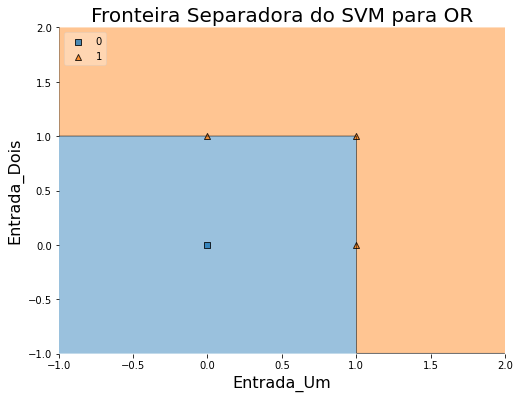

In [133]:
Parametros_Plot_mlxtend = {"X" : X_OR.values ,
                           "y" : y_OR.values ,
                           "clf" : svm_clf_OR ,
                           "legend" : 2
                          }
fig = plt.figure(figsize=(8, 6))
plot_decision_regions(**Parametros_Plot_mlxtend)
plt.xlabel(X_OR.columns[0], size=16)
plt.ylabel(X_OR.columns[1], size=16)
plt.title('Fronteira Separadora do SVM para OR', size=20)
plt.show();

### 5.2.2. Classificando AND

In [134]:
X_AND = df_AND.iloc[:, 0:-1]
y_AND = df_AND.iloc[:, -1]
svm_clf_AND = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge", penalty='l2')),
])
svm_clf_AND.fit(X_AND, y_AND)
Predicao_AND = svm_clf_AND.predict(X_AND)
confusion_matrix(y_AND, Predicao_AND)

array([[3, 0],
       [0, 1]])

#### 5.2.2.1. Plotando o Vetor de Suporte

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


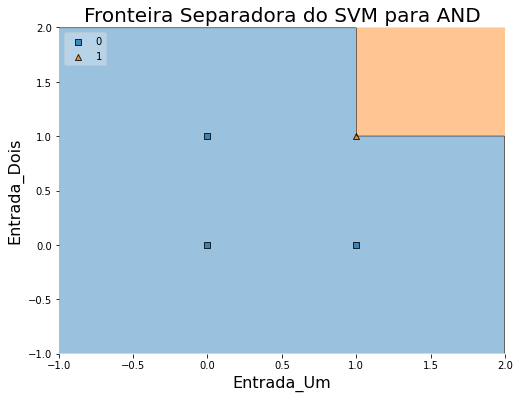

In [135]:
Parametros_Plot_mlxtend = {"X" : X_AND.values ,
                           "y" : y_AND.values ,
                           "clf" : svm_clf_AND ,
                           "legend" : 2
                          }
fig = plt.figure(figsize=(8, 6))
plot_decision_regions(**Parametros_Plot_mlxtend)
plt.xlabel(X_AND.columns[0], size=16)
plt.ylabel(X_AND.columns[1], size=16)
plt.title('Fronteira Separadora do SVM para AND', size=20)
plt.show();

### 5.2.3. Classificando XOR

In [136]:
X_XOR = df_XOR.iloc[:, 0:-1]
y_XOR = df_XOR.iloc[:, -1]
svm_clf_XOR = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "squared_hinge", penalty='l2')),
])
svm_clf_XOR.fit(X_XOR, y_XOR)
Predito_XOR = svm_clf_XOR.predict(X_XOR)
print(Predito_XOR)
confusion_matrix(y_XOR, Predito_XOR)

[1 1 0 0]


array([[1, 1],
       [1, 1]])

- Por que não deu certo acima?

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [138]:
X_XOR = df_XOR.iloc[:, 0:-1]
y_XOR = df_XOR.iloc[:, -1]
svm_clf_XOR = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 2)),
    ("linear_svc", LinearSVC(C = 1, loss = "squared_hinge", penalty='l2', )),
])
svm_clf_XOR.fit(X_XOR, y_XOR)
Predito_XOR = svm_clf_XOR.predict(X_XOR)
confusion_matrix(y_XOR, Predito_XOR)

array([[2, 0],
       [0, 2]])

In [139]:
df_XOR_Resultado = df_XOR.copy()
df_XOR_Resultado["Predito_XOR"] = Predito_XOR
df_XOR_Resultado

,Entrada_Um,Entrada_Dois,Saida_XOR,Predito_XOR
Lição,,,,
1,0,0,0,0
2,0,1,1,1
3,1,0,1,1
4,1,1,0,0


#### 5.2.3.1. Plotando o Vetor de Suporte

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


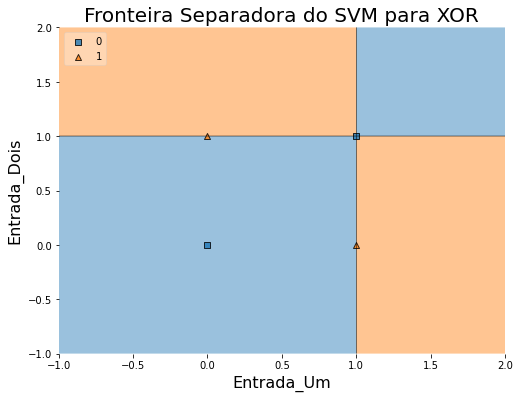

In [140]:
Parametros_Plot_mlxtend = {"X" : X_XOR.values ,
                           "y" : y_XOR.values ,
                           "clf" : svm_clf_XOR ,
                           "legend" : 2
                          }
fig = plt.figure(figsize=(8, 6))
plot_decision_regions(**Parametros_Plot_mlxtend)
plt.xlabel(X_XOR.columns[0], size=16)
plt.ylabel(X_XOR.columns[1], size=16)
plt.title('Fronteira Separadora do SVM para XOR', size=20)
plt.show();

### 5.2.4. Classificando Tipos de Cancer

In [141]:
df_Cancer = pd.read_excel("breastCancer.xlsx", index_col = "id")
df_Cancer.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


- Cancer do tipo 2 ==> Verdadeiro positivo
- Cancer do tipo 4 ==> Verdadeiro negativo

In [142]:
X_Cancer = df_Cancer.iloc[:, 0:-1]
y_Cancer = df_Cancer.iloc[:, -1]
svm_clf_Cancer = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge", penalty='l2', max_iter = 1000)),
])
svm_clf_Cancer.fit(X_Cancer, y_Cancer)
Predicao_Cancer = svm_clf_Cancer.predict(X_Cancer)
confusion_matrix(y_Cancer, Predicao_Cancer)

array([[432,  12],
       [  7, 232]])

In [143]:
len(y_Cancer)

683

In [144]:
y_Cancer.value_counts()

2    444
4    239
Name: class, dtype: int64

In [145]:
df_Cancer_Resultado = df_Cancer.copy()
df_Cancer_Resultado["Predicao_Cancer"] = Predicao_Cancer
df_Cancer_Resultado.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class,Predicao_Cancer
id,,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2,2
1002945,5,4,4,5,7,10,3,2,1,2,4
1015425,3,1,1,1,2,2,3,1,1,2,2
1016277,6,8,8,1,3,4,3,7,1,2,4
1017023,4,1,1,3,2,1,3,1,1,2,2


$W = X^T * y + \xi(Erro)$

- Onde a constante, por padrão, e igual a 1
- Constante alta (maior que 1) você considera mais o erro
_ Constante baixa (menor que 1 ou pode ser até 0) você rejeita mais o erro

In [146]:
df_Cancer_Resultado.iloc[:, -2:]

,class,Predicao_Cancer
id,,
1000025,2,2
1002945,2,4
1015425,2,2
1016277,2,4
1017023,2,2
...,...,...
776715,2,2
841769,2,2
888820,4,4


In [0]:
from sklearn.metrics import accuracy_score

In [148]:
Acuracia_Cancer = accuracy_score(y_Cancer, Predicao_Cancer)
Acuracia_Cancer = round(Acuracia_Cancer * 100, 2)
Acuracia_Cancer

97.22

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


<Figure size 1152x432 with 0 Axes>

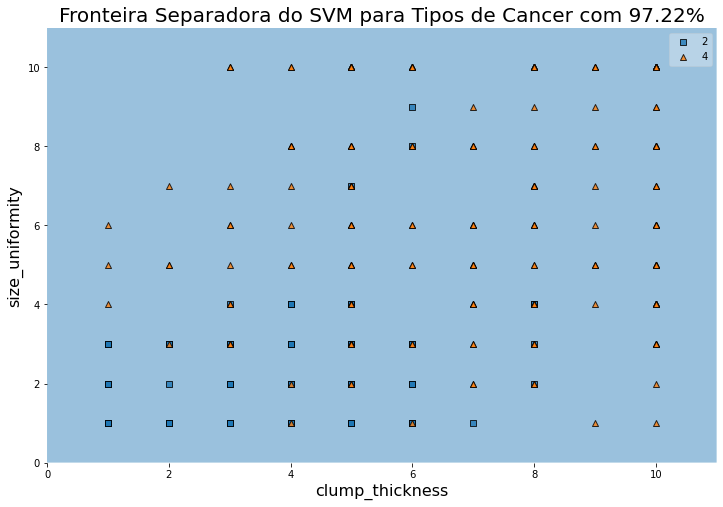

In [150]:
valor = 10
plt.figure(figsize = (16, 6))
Parametros_Plot_mlxtend = {"X" : X_Cancer.values,
                           "y" : y_Cancer.values,
                           "clf" : svm_clf_Cancer,
                           "filler_feature_values" : {2: valor, 3: valor, 4: valor, 5: valor, 6: valor, 7: valor, 8: valor},
                           "filler_feature_ranges" : {2: valor, 3: valor, 4: valor, 5: valor, 6: valor, 7: valor, 8: valor}
                          }
fig = plt.figure(figsize=(12, 8))
plot_decision_regions(**Parametros_Plot_mlxtend)
plt.xlabel(X_Cancer.columns[0], size = 16)
plt.ylabel(X_Cancer.columns[1], size = 16)
plt.title(f'Fronteira Separadora do SVM para Tipos de Cancer com {Acuracia_Cancer}%', size = 20)
plt.show();

### 5.2.5 Rodar a base de câncer com apenas as duas colunas com melhor correlação

In [152]:
df_Cancer.corr().iloc[:, -1:]

,class
clump_thickness,0.714790
size_uniformity,0.820801
shape_uniformity,0.821891
marginal_adhesion,0.706294
epithelial_size,0.690958
bare_nucleoli,0.822696
bland_chromatin,0.758228
normal_nucleoli,0.718677
mitoses,0.423448
class,1.000000


In [153]:
df_Cancer.corr()['class']

clump_thickness      0.714790
size_uniformity      0.820801
shape_uniformity     0.821891
marginal_adhesion    0.706294
epithelial_size      0.690958
bare_nucleoli        0.822696
bland_chromatin      0.758228
normal_nucleoli      0.718677
mitoses              0.423448
class                1.000000
Name: class, dtype: float64

In [154]:
df_Cancer.corr().iloc[:, -1:].sort_values(by='class')

,class
mitoses,0.423448
epithelial_size,0.690958
marginal_adhesion,0.706294
clump_thickness,0.714790
normal_nucleoli,0.718677
bland_chromatin,0.758228
size_uniformity,0.820801
shape_uniformity,0.821891
bare_nucleoli,0.822696
class,1.000000


In [158]:
df_Cancer_Otimizada = df_Cancer.loc[:, ['bare_nucleoli', 'shape_uniformity', 'class']]
df_Cancer_Otimizada.head()

,bare_nucleoli,shape_uniformity,class
id,,,
1000025,1,1,2
1002945,10,4,2
1015425,2,1,2
1016277,4,8,2
1017023,1,1,2


In [161]:
X_Cancer_Otimizada = df_Cancer_Otimizada.iloc[:, 0:-1]
y_Cancer_Otimizada = df_Cancer_Otimizada.iloc[:, -1]
svm_clf_Cancer_Otimizada = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge", penalty='l2', max_iter = 1000)),
])
svm_clf_Cancer_Otimizada.fit(X_Cancer_Otimizada, y_Cancer_Otimizada)
Predicao_Cancer_Otimizada = svm_clf_Cancer_Otimizada.predict(X_Cancer_Otimizada)
confusion_matrix(y_Cancer_Otimizada, Predicao_Cancer_Otimizada)

array([[430,  14],
       [ 16, 223]])

In [163]:
df_Cancer_Otimizada_Resultado = df_Cancer_Otimizada.copy()
df_Cancer_Otimizada_Resultado["Predicao_Cancer_Otimizada"] = Predicao_Cancer_Otimizada
df_Cancer_Otimizada_Resultado.head()

,bare_nucleoli,shape_uniformity,class,Predicao_Cancer_Otimizada
id,,,,
1000025,1,1,2,2
1002945,10,4,2,4
1015425,2,1,2,2
1016277,4,8,2,4
1017023,1,1,2,2


In [165]:
Acuracia_Cancer_Otimizada = accuracy_score(y_Cancer_Otimizada, Predicao_Cancer_Otimizada)
Acuracia_Cancer_Otimizada = round(Acuracia_Cancer_Otimizada * 100, 2)
Acuracia_Cancer_Otimizada

95.61

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


<Figure size 1152x432 with 0 Axes>

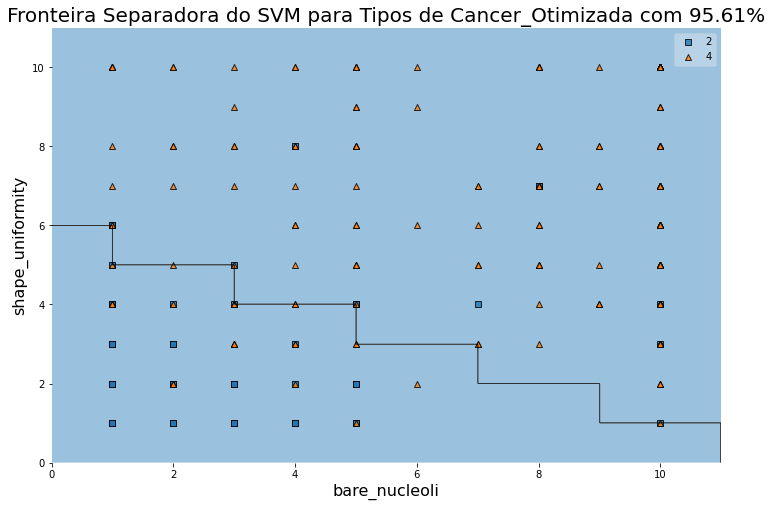

In [167]:
valor = 10
plt.figure(figsize = (16, 6))
Parametros_Plot_mlxtend = {"X" : X_Cancer_Otimizada.values,
                           "y" : y_Cancer_Otimizada.values,
                           "clf" : svm_clf_Cancer_Otimizada,
                           "filler_feature_values" : {2: valor, 3: valor, 4: valor, 5: valor, 6: valor, 7: valor, 8: valor},
                           "filler_feature_ranges" : {2: valor, 3: valor, 4: valor, 5: valor, 6: valor, 7: valor, 8: valor}
                          }
fig = plt.figure(figsize=(12, 8))
plot_decision_regions(**Parametros_Plot_mlxtend)
plt.xlabel(X_Cancer_Otimizada.columns[0], size = 16)
plt.ylabel(X_Cancer_Otimizada.columns[1], size = 16)
plt.title(f'Fronteira Separadora do SVM para Tipos de Cancer_Otimizada com {Acuracia_Cancer_Otimizada}%', size = 20)
plt.savefig("Gráfico_Cancer_Otimizada.jpg")
plt.show();